In [1]:
import scipy.io as sio
import scipy.stats as stats
from scipy import spatial
import copy
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.integrate import odeint
from copy import deepcopy
#from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import seaborn as sns
import networkx as nx
from itertools import combinations
from itertools import permutations
import random
from scipy.spatial import distance

In [2]:
def nmol_transform(compotype):
    nmol = []
    for val in compotype:
        if val >= 1:
            nmol.append(1)
        else:
            nmol.append(0)
    return nmol

In [4]:
data = sio.loadmat('C:\\Users\\Amit\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Compotype Database 10K.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'compotype_mat'])

In [5]:
beta_amount = 10000

compotypes_dict = {}
counter = 0
for beta_mat in data['compotype_mat'][0]:
    counter +=1
    compotypes_dict[counter] = []
    df = pd.DataFrame(beta_mat)
#     display(df)
    if len(list(df.columns)) == 1:
        compotype = list(df.iloc[:,0])
        compotypes_dict[counter].append(compotype)
    else:
        for column in df.columns:
            compotype = list(df.loc[:,column])
            compotypes_dict[counter].append(compotype)

5123


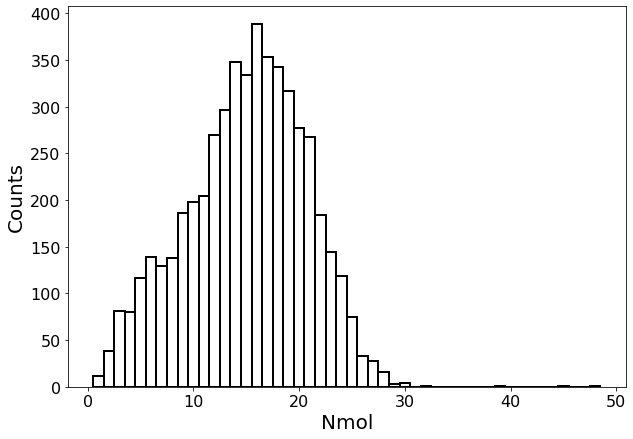

In [6]:
beta_amount = 10000
only_single_compotypes = True

nmol_list = []
for beta in range(1,beta_amount+1):
    compotypes = compotypes_dict[beta]
    if only_single_compotypes:
        if len(compotypes) > 1:
            continue
    compotype = compotypes[0]
    compotype_bool = nmol_transform(compotype)
    nmol_idxs = [counter for counter,value in enumerate(compotype_bool) if value == 1]
    nmol = len(nmol_idxs)
    nmol_list.append(nmol)
        
print(len(nmol_list))
largest_nmol = max(nmol_list)
xaxis = list(range(1,largest_nmol+1))
size_counts = []
for size in xaxis:
    count = nmol_list.count(size)
    size_counts.append(count)

fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(xaxis,size_counts, width=1, ec='k', fc='w',linewidth=2)
# plt.title("Histogram of Nmol in Single Compotypes", fontsize=20)
plt.xlabel("Nmol",fontsize=20)
plt.tick_params(labelsize=16)
plt.ylabel("Counts",fontsize=20)
# ax.set_yscale('log')
plt.savefig("Nmol Distribution in Single Compotypes.pdf")